# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X)

StandardScaler()

In [10]:
X_scaler = scaler.transform(X)

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [13]:
k_means = KMeans(n_clusters=8, 
                 random_state=0)

k_means.fit(X_scaler)

KMeans(random_state=0)

In [15]:
silhouette_score(X_scaler, labels=k_means.labels_)

0.15777035021428826

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [16]:
k_means = KMeans(n_clusters=5, 
                 random_state=0)

k_means.fit(X_scaler)

KMeans(n_clusters=5, random_state=0)

In [17]:
silhouette_score(X_scaler, labels=k_means.labels_)

0.22964640104552184

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [18]:
k_means = KMeans(n_clusters=3, 
                 random_state=0)

k_means.fit(X_scaler)

KMeans(n_clusters=3, random_state=0)

In [19]:
silhouette_score(X_scaler, labels=k_means.labels_)

0.2848589191898987

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

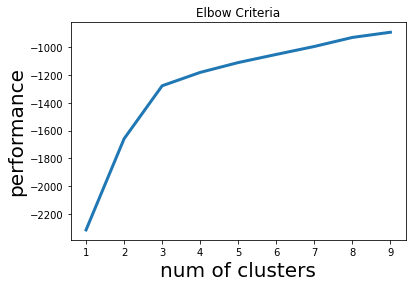

In [20]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [km[i].fit(X_scaler).score(X_scaler) for i in range(len(km))]
plt.title('Elbow Criteria')
plt.xlabel('num of clusters', size=20)
plt.ylabel('performance', size=20)
plt.plot(Ks, score, lw=3)
plt.show()

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

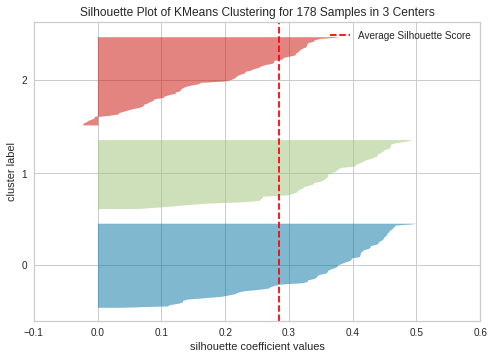

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_scaler)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

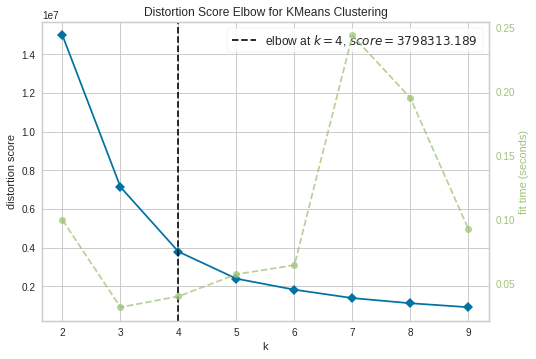

/home/patricia/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

X, y = load_nfl()

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), X_scaler, k=(2,10))

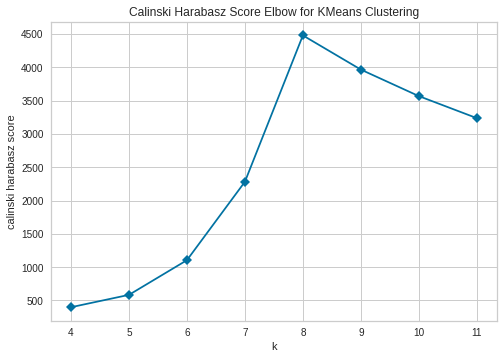

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [28]:

from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()      

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

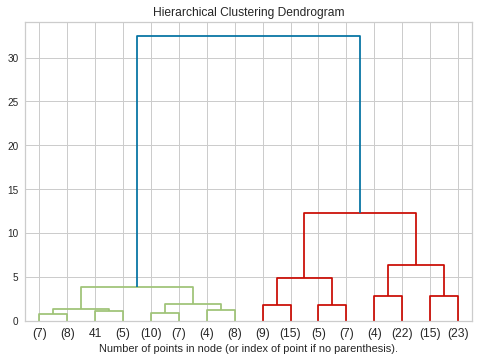

In [35]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [40]:
pca_pipeline = make_pipeline(StandardScaler(), 
                             PCA(2))
pca_pipeline.fit(X_scaler)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [41]:
pca = pca_pipeline.named_steps['pca']
pca.explained_variance_ratio_

array([0.30567242, 0.11677967])

/home/patricia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


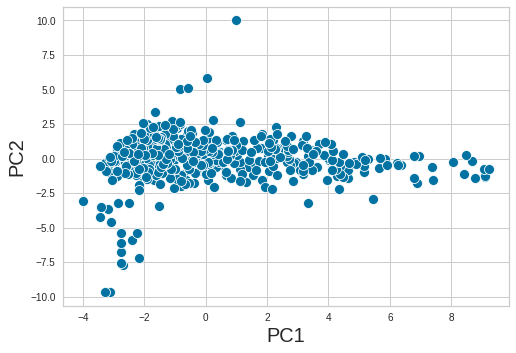

In [45]:
transformed_X = pca_pipeline.transform(X_scaler)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])


sns.scatterplot('PC1', 'PC2', data=data, s= 100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [47]:
from sklearn.manifold import TSNE

In [48]:
tsne = TSNE(n_components=2, perplexity=30)
transformed_X = tsne.fit_transform(X_scaler)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['target'] = y

sns.scatterplot('PC1', 'PC2', data=data, s= 100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.show()

ValueError: Length of values (1000) does not match length of index (494)